## Ques1. a) CNN model from scratch: Develop a CNN model with 5 convolutional layers (with kernel size= 3,stride =1, padding = “same”, activation function = “relu”) with following MaxPooling layer (Size=2) and 3 fully connected layer (including one output layer). After each of the Convolutional layer apply Batch Normalization. In the fully connected layer apply dropout (rate 0.50).

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import color
import warnings
import tensorflow

warnings.filterwarnings("ignore")

In [7]:
# Importing the datasets
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [8]:
## Visualising a few images

def show_image(image, cmap_type= 'gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.axis('off')
    plt.show()

In [9]:
#visualising first ten products

sample= train_X[:9]

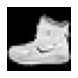

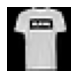

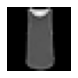

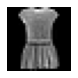

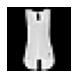

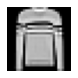

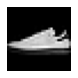

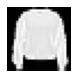

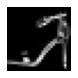

In [10]:
for a,i in enumerate(sample):
    plt.subplot(3,3,a+1)
    show_image(color.gray2rgb(i))

In [11]:
print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [12]:
# converting each 28 x 28 image of the train and testing set into a matrix of size 28 x 28 x 1
#which is fed into the network.


train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape


((60000, 28, 28, 1), (10000, 28, 28, 1))

In [13]:
# the pixels are in int form so convert its type to float32, 
#and rescaling  the pixel values in range 0 - 1

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [14]:
# Finding the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [15]:
# Changing the labels from categorical to one-hot encoding

train_Y_one_hot = pd.get_dummies(train_Y).values
test_Y_one_hot = pd.get_dummies(test_Y).values

In [16]:
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0 0 0 0 0 0 0 0 0 1]


## Modelling

### Model Architecture

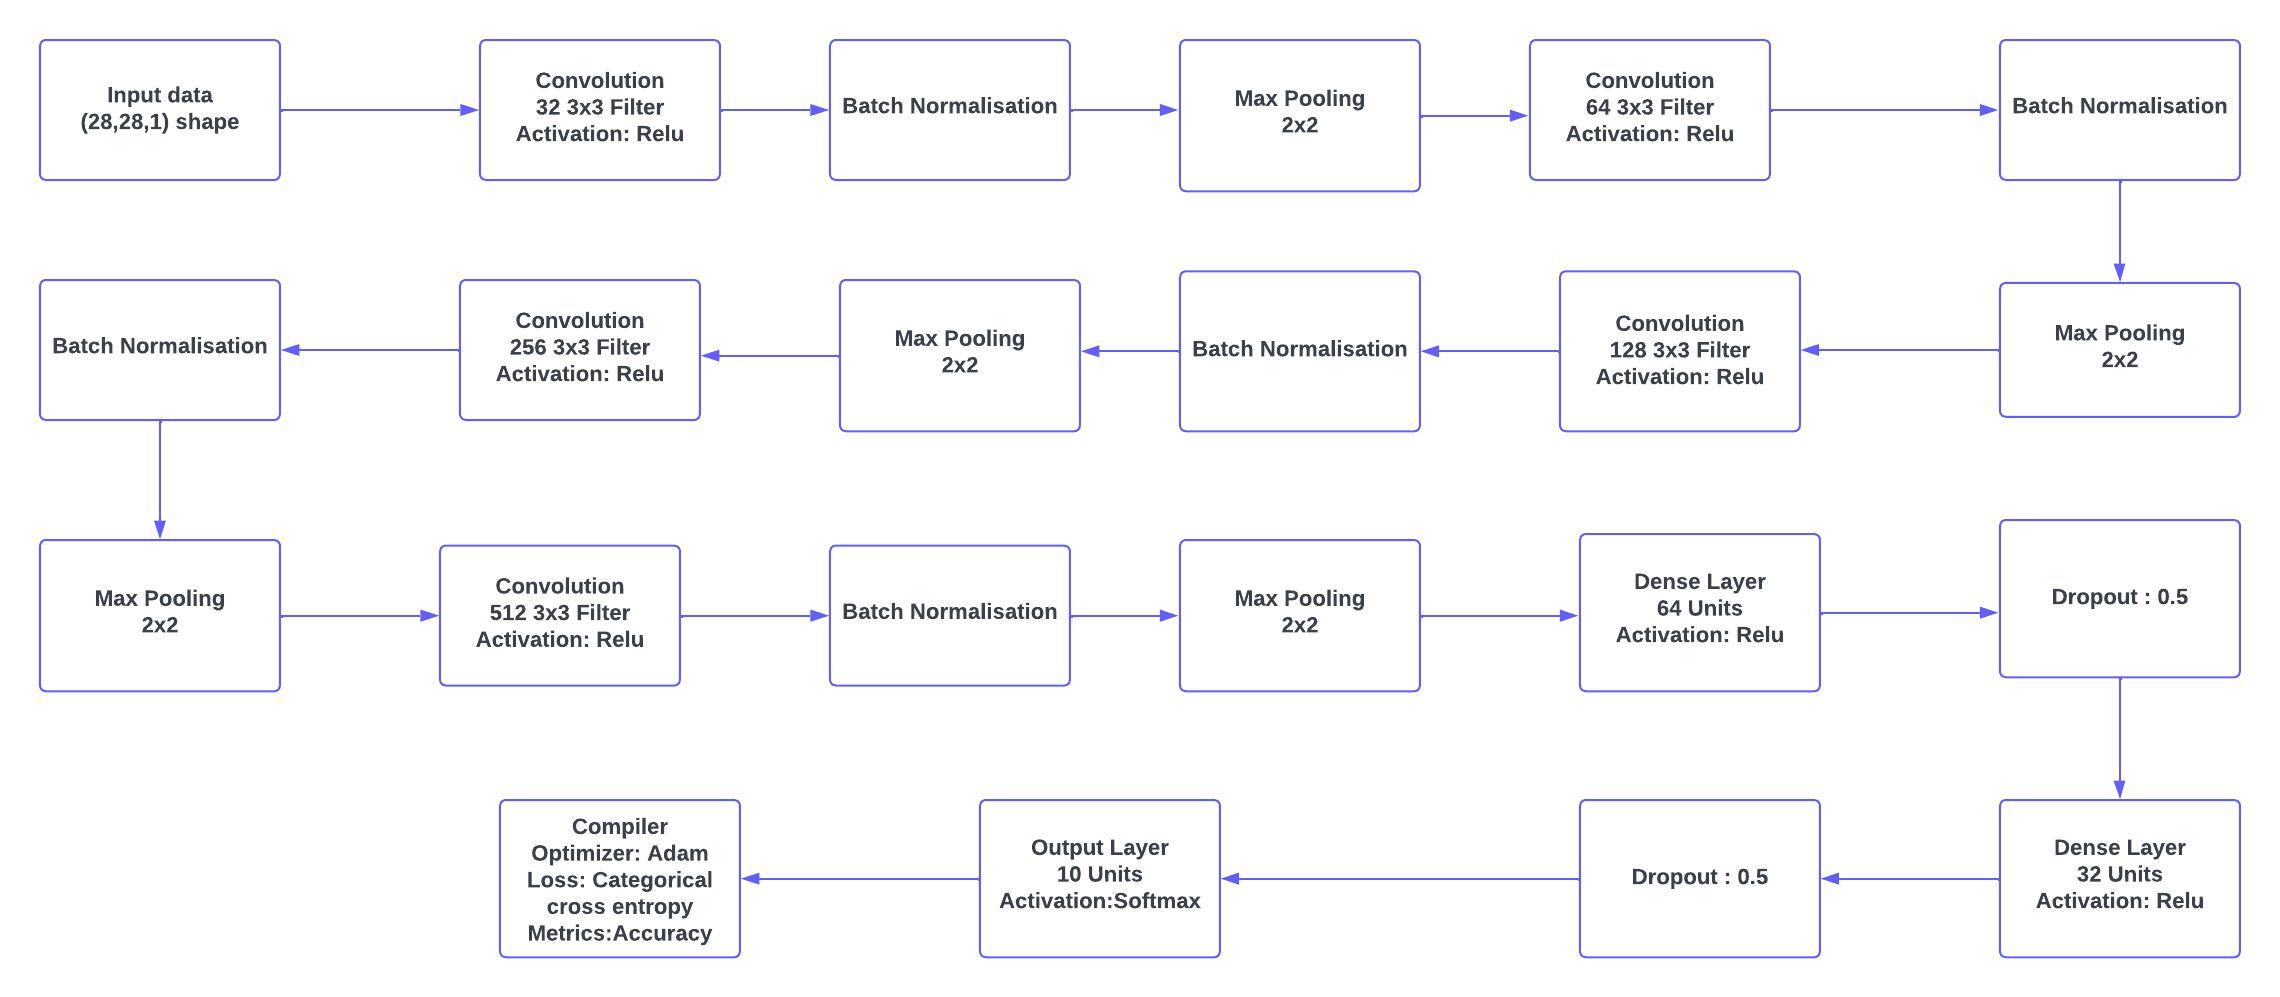

1. The input shape is (28,28,1), which means that the input image has a height and width of 28 pixels, and a depth of 1 channel (grayscale).

2. This model is a convolutional neural network (CNN) architecture with size 3, stride 1 and padding 'same'. It consists of 5 convolutional layers, each followed by a batch normalization layer and a max pooling layer. 

3. The output from the convolutional layers is flattened and then fed into two fully connected layers, each with a ReLU activation function and dropout regularization. 

4. The final layer is a dense layer with a softmax activation function to produce the output probabilities.

5. The model uses the Adam optimizer and categorical cross-entropy loss function to train, and accuracy is used as the evaluation metric.

6. Model is fitted on the trained data with 20 epochs and batch size 32 and validation and trained data accuracy and loss is compared to see that model is not overfitting

### Hyper-parameters Used

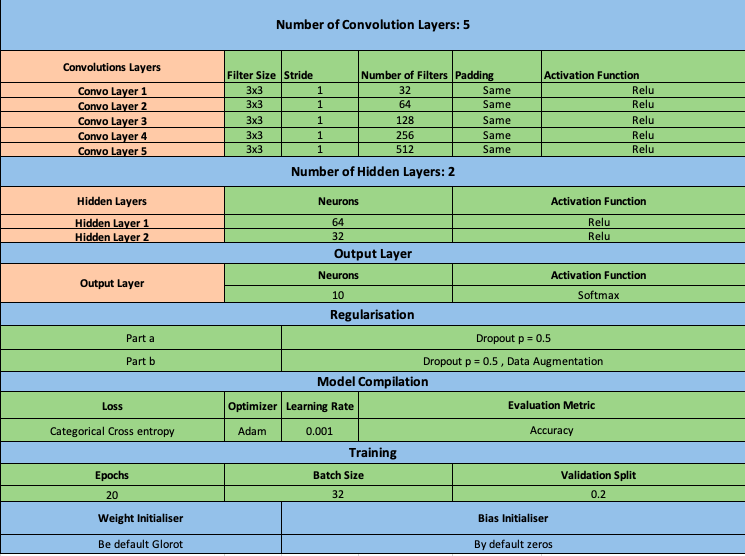

In [17]:
# Importing the libraries
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D, Dropout
from keras.layers import normalization,BatchNormalization


In [19]:
# creating the model
modela= Sequential()
# first convo layer with 32 filters
modela.add(Conv2D(32, kernel_size=3,activation='relu',input_shape=(28,28,1),padding='same', strides=(1,1)))
# Batch Normalisation
modela.add(BatchNormalization())
modela.add(MaxPooling2D(2,padding='same'))

# second convo layer with 64 filters
modela.add(Conv2D(64, kernel_size=3,activation='relu',padding='same', strides=(1,1)))
# Batch Normalisation
modela.add(BatchNormalization())
modela.add(MaxPooling2D(2,padding='same'))

# third convo layer with 128 filters
modela.add(Conv2D(128, kernel_size=3,activation='relu',padding='same', strides=(1,1)))
# Batch Normalisation
modela.add(BatchNormalization())
modela.add(MaxPooling2D(2,padding='same'))

# fourth convo layer with 256 filters
modela.add(Conv2D(256, kernel_size=3,activation='relu',padding='same', strides=(1,1)))
# Batch Normalisation
modela.add(BatchNormalization())
modela.add(MaxPooling2D(2,padding='same'))

# fifth convo layer with 512 filters
modela.add(Conv2D(512, kernel_size=3,activation='relu',padding='same', strides=(1,1)))
# Batch Normalisation
modela.add(BatchNormalization())
modela.add(MaxPooling2D(2,padding='same'))

# Flattening the output from the convolutional layers
modela.add(Flatten())


# Adding fully connected layers with dropout

# First Hidden Layer with 64 neurons
modela.add(Dense(64, activation='relu'))
# Dropout 0.5
modela.add(Dropout(0.5))

# Second Hidden Layer with 32 neurons
modela.add(Dense(32, activation='relu'))
# Dropout 0.5
modela.add(Dropout(0.5))

# Output Layer
modela.add(Dense(10, activation='softmax'))

# Compiling the model with categorical cross entropy as the output is  multi class 
# default Learning rate for Adam is 0.001
modela.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




### Model Summary

In [20]:
modela.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_5 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_6 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                      

The model has a total of 1,607,210 parameters, out of which 1,605,226 are trainable and 1,984 are non-trainable. The model consists of convolutional layers, batch normalization layers, max pooling layers, fully connected layers with dropout, and an output layer with softmax activation. The architecture progressively reduces the spatial dimensions of the input, from 28x28 to 1x1, while increasing the number of channels in each convolutional layer. The model was compiled with the Adam optimizer ( it computes adaptive learning rates for each parameter and performs both momentum and RMSprop style updates for faster convergence),  accuracy as the evaluation metric. and categorical cross-entropy loss function, and trained with accuracy as the evaluation metric.

In total, this model has 1,607,210 parameters, out of which 1,605,226 are trainable.

### Training the Model


In [22]:
import time # to record time taken for training 

In [23]:
start_timea = time.time()

In [24]:
# training the model with batch size 32 epoch = 20 ,and with validation split= 0.2 

historya = modela.fit(train_X, train_Y_one_hot, batch_size=32, epochs=20,verbose=1,validation_split = 0.2)

Epoch 1/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2775 - accuracy: 0.9031 - val_loss: 0.2814 - val_accuracy: 0.9104
Epoch 2/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2714 - accuracy: 0.9048 - val_loss: 0.2718 - val_accuracy: 0.9233
Epoch 3/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2622 - accuracy: 0.9083 - val_loss: 0.2843 - val_accuracy: 0.9161
Epoch 4/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2507 - accuracy: 0.9116 - val_loss: 0.2744 - val_accuracy: 0.9118
Epoch 5/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2483 - accuracy: 0.9136 - val_loss: 0.3987 - val_accuracy: 0.8841
Epoch 6/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2275 - accuracy: 0.9189 - val_loss: 0.2912 - val_accuracy: 0.9195
Epoch 7/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2147 - accuracy: 0.9232 - val_loss: 0.3199 - val_ac

In [25]:
end_timea = time.time()

In [26]:
total_timea = end_timea - start_timea

In [27]:
print("Total execution time: ", total_timea, " seconds")

Total execution time:  200.49847745895386  seconds


### Evaluation

In [28]:
# evaluating the performance model on test data
test_evala = modela.evaluate(test_X, test_Y_one_hot, verbose=0)

In [29]:
# printing the loss and accuracy value on test data
print('Test loss:', test_evala[0])
print('Test accuracy:', test_evala[1])

Test loss: 0.4806569218635559
Test accuracy: 0.9092000126838684


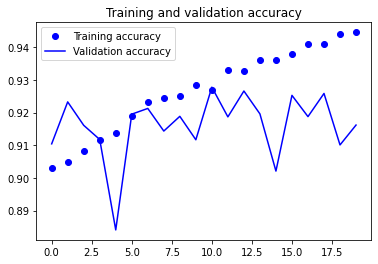

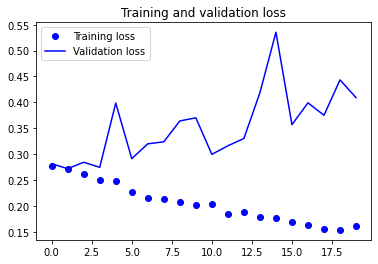

In [30]:
# print both accuracy and loss per ephoch for both training and validation set
# Getting the model accuracy from keras callback history function

accuracy = historya.history['accuracy']
val_accuracy = historya.history['val_accuracy']
loss = historya.history['loss']
val_loss = historya.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Predictions

In [31]:
# predicting the probablities for all class 
predictiona= modela.predict(test_X) 

313/313 [==============================] - 1s 2ms/step


#### using np.argmax to get the index of max probablity value for the specific class.As the target values is one hot encoded, the returned index from predictions will map to the index of one hot encoded which will give the number. For example, if the predicted output for a given input is [0, 0, 0.8, 0.2, 0, 0, 0, 0, 0, 0], the np.argmax() function will return 2, which is the index of the maximum value in the predicted vector. Since the classes are numbered from 0 to 9 in this case, the predicted class label is 2, which corresponds to the digit 2.

In [32]:

predictiona = np.argmax(np.round(predictiona),axis=1)

In [33]:
# converting string format to integer
test_Y

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [34]:
# dictionary to match numbers with clothe items 

clothes_dict= {9: "Ankle boot", 8: "Bag",7: "Sneaker", 6: 'Shirt', 5: 'Sandal', 4: 'Coat', 3:"Dress", 2: 'Pullover',
              1: 'Trouser' , 0 :'T-Shirt/ top'}

In [35]:

test_Ya = [""]*len(test_Y)
for i in range(len(test_Y)):
    test_Ya[i] = clothes_dict[test_Y[i]]

In [36]:
predictiona1= [""]*len(predictiona)
for i in range(len(predictiona)):
    predictiona1[i] = clothes_dict[predictiona[i]]

In [37]:
# using np.where function to match actual and predicted values. 
#If both are same then it will return the index where both values are same
correct = np.where(predictiona==test_Y)[0] # this returns the indices
print("Found %d correct labels" % len(correct), "where test data has", len(test_Y), "values")

Found 9077 correct labels where test data has 10000 values


Actual Value is Ankle boot
Predicted Value is  Ankle boot


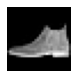

------------------


Actual Value is Pullover
Predicted Value is  Pullover


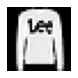

------------------


Actual Value is Trouser
Predicted Value is  Trouser


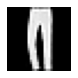

------------------


Actual Value is Trouser
Predicted Value is  Trouser


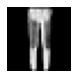

------------------


Actual Value is Shirt
Predicted Value is  Shirt


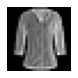

------------------


Actual Value is Trouser
Predicted Value is  Trouser


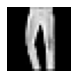

------------------


Actual Value is Coat
Predicted Value is  Coat


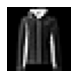

------------------


Actual Value is Shirt
Predicted Value is  Shirt


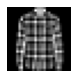

------------------


Actual Value is Sandal
Predicted Value is  Sandal


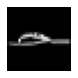

------------------




In [38]:
# Printing first nine predicted and actual values
for i in range(9):
    print("Actual Value is" ,test_Ya[i]) # test data 
    print("Predicted Value is ",predictiona1[i]) # predictions
    plt.subplot(3,3,i+1)
    show_image(test_X[i].reshape(28,28))
    print("------------------")
    print("\n")

### Confusion Matrix and Performance Score

In [39]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [40]:
cm = confusion_matrix(test_Y, predictiona) 
#printing the confusion matrix to see corrrect and wrong predicted values
print(cm)

[[782   0  14  32   4   0 159   0   9   0]
 [  4 982   0  12   1   0   0   0   1   0]
 [ 29   1 793  12  90   0  75   0   0   0]
 [ 18   2   4 942  17   0  15   0   2   0]
 [  6   0  11  30 904   0  48   0   1   0]
 [  0   0   0   0   0 955   0  33   0  12]
 [ 73   0  24  36  58   0 803   0   6   0]
 [  0   0   0   0   0   0   0 990   0  10]
 [  5   0   0   3   2   0   2   3 984   1]
 [  2   0   1   0   0   3   0  52   0 942]]


<Axes: >

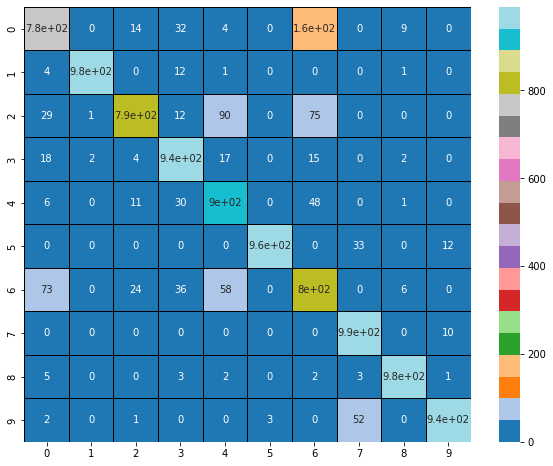

In [41]:
plt.figure(figsize=(10,8)) # visualising the confusion matrix in heatmap
sns.heatmap(cm,annot=True, cmap= 'tab20',linewidths=1, linecolor= 'black')

In [42]:
print("Precision Score is ", precision_score(test_Y, predictiona, average = 'weighted'))

Precision Score is  0.9108256205924419


In [43]:
print("Recall Score is ", recall_score(test_Y, predictiona, average = 'weighted'))

Recall Score is  0.9077


In [44]:
print("F1 Score is " ,f1_score(test_Y, predictiona, average = 'weighted'))

F1 Score is  0.9079153266165798


## Ques 1 b) Data Augmentation: Apply two image augmentation techniques on the Fashion Mnist train data to augment it and then apply the previously developed model on it.

### Model architecture and hyper-parameters used are same as used in Ques 1 part a. 

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # importing the  library for data augmentation

In [46]:
datagen = ImageDataGenerator(
    rotation_range=15,     # Rotate images randomly up to 15 degrees
    zoom_range=0.1,        # Randomly zoom images in and out
    width_shift_range=0.1, # Shift images horizontally
    height_shift_range=0.1 # Shift images vertically
)

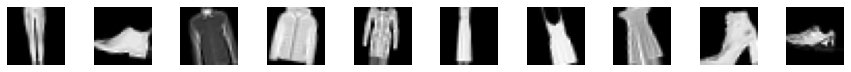

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Preparing a batch of data from the original dataset
sample_images, sample_labels = next(iter(datagen.flow(train_X, train_Y_one_hot, batch_size=32)))

# Plotting some augmented images
num_images_to_show = 10

fig, axes = plt.subplots(1, num_images_to_show, figsize=(15, 15))
axes = axes.ravel()

for i in np.arange(0, num_images_to_show):
    axes[i].imshow(sample_images[i].reshape(28, 28), cmap='gray')
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)
plt.show()


In [53]:
# Preparing the training and validation data 
from sklearn.model_selection import train_test_split


trainX,  valid_X, testY, valid_Y = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=42)

In [49]:
# creating the model 
modelb= Sequential()

# First convo layer 
modelb.add(Conv2D(32, kernel_size=3,activation='relu',input_shape=(28,28,1),padding='same', strides=(1,1)))
modelb.add(BatchNormalization())
modelb.add(MaxPooling2D(2,padding='same'))

# Second convo layer 
modelb.add(Conv2D(64, kernel_size=3,activation='relu',padding='same', strides=(1,1)))
modelb.add(BatchNormalization())
modelb.add(MaxPooling2D(2,padding='same'))

# Third convo layer 
modelb.add(Conv2D(128, kernel_size=3,activation='relu',padding='same', strides=(1,1)))
modelb.add(BatchNormalization())
modelb.add(MaxPooling2D(2,padding='same'))

# Forth convo layer 
modelb.add(Conv2D(256, kernel_size=3,activation='relu',padding='same', strides=(1,1)))
modelb.add(BatchNormalization())
modelb.add(MaxPooling2D(2,padding='same'))

# Fifth convo layer 
modelb.add(Conv2D(512, kernel_size=3,activation='relu',padding='same', strides=(1,1)))
modelb.add(BatchNormalization())
modelb.add(MaxPooling2D(2,padding='same'))

# Flattening the output from the convolutional layers
modelb.add(Flatten())


# Adding fully connected layers with dropout
modelb.add(Dense(64, activation='relu'))
modelb.add(Dropout(0.5))
modelb.add(Dense(32, activation='relu'))
modelb.add(Dropout(0.5))
modelb.add(Dense(10, activation='softmax'))

# Compiling the model with categorical cross entropy as target is multi class and by default learning rate is 0.01 for adam
modelb.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [50]:
modelb.summary() # Summary of the model 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_15 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_16 (Bat  (None, 14, 14, 64)       256       
 chNormalization)                                                
                                                      

The model has a total of 1,607,210 parameters, out of which 1,605,226 are trainable and 1,984 are non-trainable. The model consists of convolutional layers, batch normalization layers, max pooling layers, fully connected layers with dropout, and an output layer with softmax activation. The architecture progressively reduces the spatial dimensions of the input, from 28x28 to 1x1, while increasing the number of channels in each convolutional layer. The model was compiled with the Adam optimizer ( it computes adaptive learning rates for each parameter and performs both momentum and RMSprop style updates for faster convergence),  accuracy as the evaluation metric. and categorical cross-entropy loss function, and trained with accuracy as the evaluation metric.

In total, this model has 1,607,210 parameters, out of which 1,605,226 are trainable.

Data augmentation has been done using Keras ImageGenerator. This helps to increase the size of the training dataset by generating new images by applying various transformations like rotation, zooming, shifting. This helps to improve the generalization of the model by reducing overfitting.



### Training the Model 

In [51]:
start_timeb = time.time()

In [54]:
# training the model 
historyb = modelb.fit(datagen.flow(trainX, testY, batch_size=32),
                    epochs=20, validation_data= (valid_X, valid_Y),verbose=1)



Epoch 1/20
1500/1500 [==============================] - 21s 11ms/step - loss: 1.3230 - accuracy: 0.5002 - val_loss: 0.7247 - val_accuracy: 0.7169
Epoch 2/20
1500/1500 [==============================] - 16s 11ms/step - loss: 0.9539 - accuracy: 0.6136 - val_loss: 0.5996 - val_accuracy: 0.7868
Epoch 3/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.8673 - accuracy: 0.6470 - val_loss: 0.6816 - val_accuracy: 0.7465
Epoch 4/20
1500/1500 [==============================] - 16s 11ms/step - loss: 0.7903 - accuracy: 0.6861 - val_loss: 0.5753 - val_accuracy: 0.8007
Epoch 5/20
1500/1500 [==============================] - 16s 11ms/step - loss: 0.7312 - accuracy: 0.7247 - val_loss: 0.4965 - val_accuracy: 0.8152
Epoch 6/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.6808 - accuracy: 0.7501 - val_loss: 0.4791 - val_accuracy: 0.8181
Epoch 7/20
1500/1500 [==============================] - 16s 11ms/step - loss: 0.6314 - accuracy: 0.7696 - val_loss: 0.4653 -

In [55]:
end_timeb = time.time()

In [56]:
total_timeb = end_timeb - start_timeb

In [57]:
print("Total execution time: ", total_timeb, " seconds")

Total execution time:  362.29075384140015  seconds


### Evaluation

In [58]:
# evaluating the performance of model on test data 
test_evalb = modelb.evaluate(test_X, test_Y_one_hot, verbose=0)

In [59]:
print('Test loss:', test_evalb[0])
print('Test accuracy:', test_evalb[1])

Test loss: 0.34032368659973145
Test accuracy: 0.892799973487854


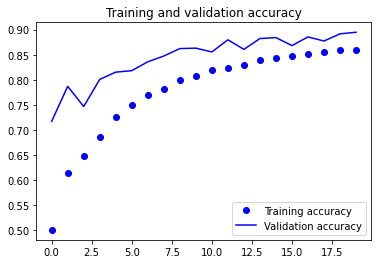

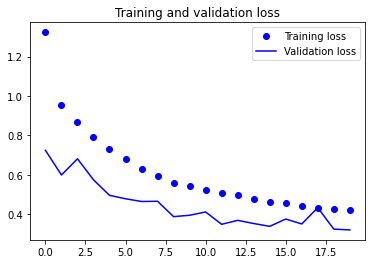

In [60]:
# print both accuracy and loss per ephoch for both training and validation set
# Getting the model accuracy from keras callback history function

accuracy = historyb.history['accuracy']
val_accuracy = historyb.history['val_accuracy']
loss = historyb.history['loss']
val_loss = historyb.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Predictions

In [61]:
# predicting the probablities for all class 
predictionb= modelb.predict(test_X)

313/313 [==============================] - 1s 2ms/step


#### using np.argmax to get the index of max probablity value for the specific class.As the target values is one hot encoded, the returned index from predictions will map to the index of one hot encoded which will give the number. For example, if the predicted output for a given input is [0, 0, 0.8, 0.2, 0, 0, 0, 0, 0, 0], the np.argmax() function will return 2, which is the index of the maximum value in the predicted vector. Since the classes are numbered from 0 to 9 in this case, the predicted class label is 2, which corresponds to the digit 2.

In [62]:
predictionb = np.argmax(np.round(predictionb),axis=1)

In [63]:
# dictionary to map numbers to their respective clothe items
clothes_dict= {9: "Ankle boot", 8: "Bag",7: "Sneaker", 6: 'Shirt', 5: 'Sandal', 4: 'Coat', 3:"Dress", 2: 'Pullover',
              1: 'Trouser' , 0 :'T-Shirt/ top'}

In [64]:
predictionb1= [""]*len(predictionb)
for i in range(len(predictionb)):
    predictionb1[i] = clothes_dict[predictionb[i]]

In [65]:
# using np.where function to match actual and predicted values. 
#If both are same then it will return the index where both values are same
correct = np.where(predictionb==test_Y)[0] # this returns the indices
print("Found %d correct labels" % len(correct), "where test data has", len(test_Y), "values")

Found 8731 correct labels where test data has 10000 values


Actual Value is Ankle boot
Predicted Value is  9


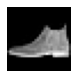

------------------


Actual Value is Pullover
Predicted Value is  2


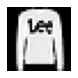

------------------


Actual Value is Trouser
Predicted Value is  1


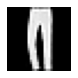

------------------


Actual Value is Trouser
Predicted Value is  1


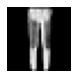

------------------


Actual Value is Shirt
Predicted Value is  6


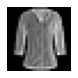

------------------


Actual Value is Trouser
Predicted Value is  1


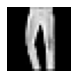

------------------


Actual Value is Coat
Predicted Value is  4


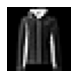

------------------


Actual Value is Shirt
Predicted Value is  6


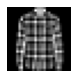

------------------


Actual Value is Sandal
Predicted Value is  5


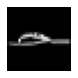

------------------




In [66]:
# Printing first nine predicted and actual values
for i in range(9):
    print("Actual Value is" ,test_Ya[i]) # test data 
    print("Predicted Value is ",predictionb[i]) # predictions
    plt.subplot(3,3,i+1)
    show_image(test_X[i].reshape(28,28))
    print("------------------")
    print("\n")

### Confusion Matrix and Performance Score

In [67]:
cm = confusion_matrix(test_Y, predictionb) 
#printing the confusion matrix to see corrrect and wrong predicted values
print(cm)

[[897   0   6  10   1   2  78   0   6   0]
 [  6 985   0   7   0   0   1   0   1   0]
 [105   1 844   2  25   0  21   0   2   0]
 [122  10   2 823  11   1  23   0   8   0]
 [121   0  74  30 755   0  20   0   0   0]
 [  0   0   0   0   0 994   0   6   0   0]
 [312   0  52   8  67   0 556   0   5   0]
 [  5   0   0   0   0  34   0 938   0  23]
 [  9   1   0   1   0   1   1   0 987   0]
 [  6   0   0   0   0   8   0  34   0 952]]


In [68]:
print("Precision Score is ", precision_score(test_Y, predictionb, average = 'weighted'))

Precision Score is  0.8894451534174008


In [69]:
print("Recall Score is ", recall_score(test_Y, predictionb, average = 'weighted'))

Recall Score is  0.8731


In [70]:
print("F1 Score is " ,f1_score(test_Y, predictionb, average = 'weighted'))

F1 Score is  0.874542856446507


## Ques 1 c. Transfer Learning: Load the VGG-19 model. Drop after the block4 conv1 layer (highlighted in the image below) and on top of it add one global average pooling and one final output layer. Keep the base model layers (VGG19) freeze.

In [71]:
# Importing the datasets
from keras.datasets import fashion_mnist
(train_X1,train_Y1), (test_X1,test_Y1) = fashion_mnist.load_data()

In [72]:
from tensorflow.keras import layers,applications,models # importing library to load pretrained model 

In [73]:
# Normalizing the images
train_images = train_X1 / 255.0
test_images = test_X1 / 255.0

In [74]:
from skimage.transform import resize

# Function to resize the images
def resize_images(images, new_shape):
    resized_images = np.zeros((images.shape[0], *new_shape))
    for idx, img in enumerate(images):
        resized_images[idx] = resize(img, new_shape)
    return resized_images

# Resizing the images to 32x32 to be used with VGG-19
train_images = resize_images(train_images, (32, 32, 1))
test_images = resize_images(test_images, (32, 32, 1))

# Converting grayscale images to RGB  by repeating the channels.
# this is done because vgg model was trained with RGB images. 

train_images = np.repeat(train_images, 3, axis=-1)
test_images = np.repeat(test_images, 3, axis=-1)

In [75]:
train_images.shape, train_X1.shape  # shape of the resized data and original data

((60000, 32, 32, 3), (60000, 28, 28))

### Model Architecture

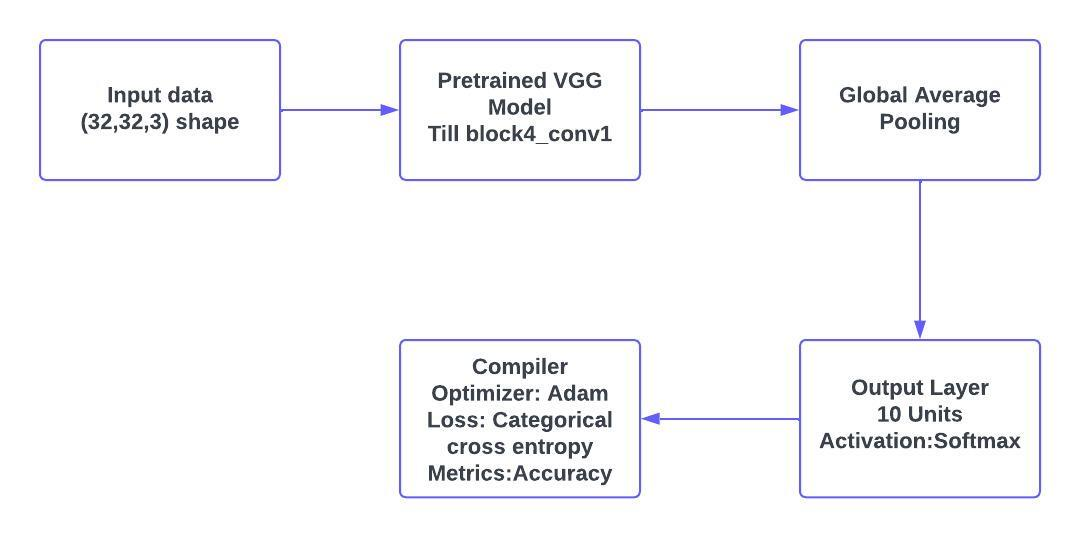

The architecture used on Fashion MNIST dataset starts by reshaping the input image to 28x28x1 and then passing it through a pre-trained VGG network. The model is only used until the conv1 layer of block4. Following this, a Global Average Pooling layer is added to reduce the dimensionality of the feature maps to 512. Finally, a dense output layer is added to predict the class label of the input image. 

### Hyperparameter in Transfer Learning


1) Layers frozen from pretrained model VGG-16= 13

2) Layers to tune from pretrained model = 0

3) New layers  added (Global Average Pooling and Output Layer)  = 2


### Modelling

In [76]:
#  Loading the VGG-19 model, drop layers after 'block4_conv1', 
# and adding a Global Average Pooling layer and an output layer

base_model = applications.VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Finding the layer after which we want to drop the layers
drop_after_layer = 'block4_conv1'
last_layer = base_model.get_layer(drop_after_layer)
last_output = last_layer.output

# Adding Global Average Pooling and output layers
x = layers.GlobalAveragePooling2D()(last_output)
x = layers.Dense(10, activation='softmax')(x)

# Creating a new model
modelc = models.Model(base_model.input, x)

# Freezing the base model layers (VGG-19) and train the new model
for layer in base_model.layers:
    layer.trainable = False
    
# compiling the model    
modelc.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

80134624/80134624 [==============================] - 5s 0us/step


### Model Summary

In [77]:
modelc.summary() # summary of the model 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

The model is a VGG pretrained model that has been used for classification. It consists of an input layer that takes in an image of shape (32,32,3). The input layer is followed by 2 convolutional layers (block1_conv1 and block1_conv2) with 64 filters each, and a max pooling layer (block1_pool) that reduces the feature map size by half.

Next, there are 2 more convolutional layers (block2_conv1 and block2_conv2) with 128 filters each, followed by another max pooling layer (block2_pool) that reduces the feature map size by half again. The next 4 convolutional layers (block3_conv1, block3_conv2, block3_conv3, and block3_conv4) have 256 filters each, and are followed by a max pooling layer (block3_pool) that reduces the feature map size by half again.

The final convolutional layer (block4_conv1) has 512 filters, and is followed by a global average pooling layer that averages the feature maps to a single vector. This is then followed by a dense layer (dense_8) with 10 units for classification.

The model has a total of 3,510,858 parameters, but only 5,130 of them are trainable, as the convolutional layers are pretrained and frozen.

### Training the Model

In [78]:
start_timec = time.time()

In [79]:
# training the model with batch size 32 and epoch= 20
historyc = modelc.fit(train_images, train_Y_one_hot, batch_size=32 ,epochs=20,verbose=1,validation_split = 0.2)


Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 1.1336 - accuracy: 0.7459 - val_loss: 0.9536 - val_accuracy: 0.7738
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.8124 - accuracy: 0.8032 - val_loss: 0.6304 - val_accuracy: 0.8332
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7661 - accuracy: 0.8149 - val_loss: 0.5305 - val_accuracy: 0.8564
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7432 - accuracy: 0.8229 - val_loss: 0.8457 - val_accuracy: 0.8082
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7148 - accuracy: 0.8289 - val_loss: 0.8929 - val_accuracy: 0.7947
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7070 - accuracy: 0.8355 - val_loss: 1.4037 - val_accuracy: 0.7347
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7189 - accuracy: 0.8353 - val_loss: 0.7619 - val_accuracy:

In [80]:
end_timec = time.time()

In [81]:
total_timec = end_timec - start_timec

In [82]:
print("Total execution time: ", total_timec, " seconds")

Total execution time:  121.30633425712585  seconds


### Evaluating the Model

In [83]:
# evaluating the performance of model in test data 

test_evalc = modelc.evaluate(test_images, test_Y_one_hot, verbose=0)

In [84]:
print('Test loss:', test_evalc[0])
print('Test accuracy:', test_evalc[1])

Test loss: 0.7428037524223328
Test accuracy: 0.8489000201225281


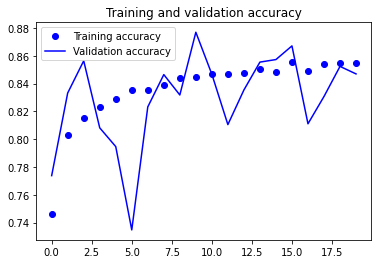

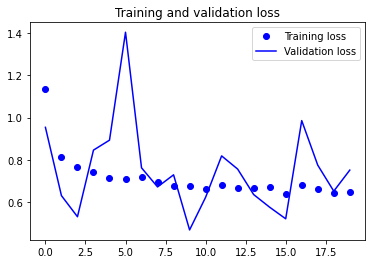

In [85]:
# print both accuracy and loss per ephoch for both training and validation set
# Getting the model accuracy from keras callback history function


accuracy = historyc.history['accuracy']
val_accuracy = historyc.history['val_accuracy']
loss = historyc.history['loss']
val_loss = historyc.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Predictions

In [86]:
# predicting the probablities for all class 
predictionc= modelc.predict(test_images)

313/313 [==============================] - 1s 3ms/step


#### using np.argmax to get the index of max probablity value for the specific class.As the target values is one hot encoded, the returned index from predictions will map to the index of one hot encoded which will give the number. For example, if the predicted output for a given input is [0, 0, 0.8, 0.2, 0, 0, 0, 0, 0, 0], the np.argmax() function will return 2, which is the index of the maximum value in the predicted vector. Since the classes are numbered from 0 to 9 in this case, the predicted class label is 2, which corresponds to the digit 2.

In [87]:
predictionc = np.argmax(np.round(predictionc),axis=1)

In [88]:
predictionc1= [""]*len(predictionc)
for i in range(len(predictionc)):
    predictionc1[i] = clothes_dict[predictionc[i]]

In [89]:
# using np.where function to match actual and predicted values. 
#If both are same then it will return the index where both values are same
correct = np.where(predictionc==test_Y)[0] # this returns the indices
print("Found %d correct labels" % len(correct), "where test data has", len(test_Y), "values")

Found 8470 correct labels where test data has 10000 values


In [90]:
test_Yc= [""]*len(test_Y)
for i in range(len(test_Y)):
    test_Yc[i] = clothes_dict[test_Y[i]]

Actual Value is Ankle boot
Predicted Value is  Ankle boot


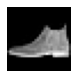

------------------


Actual Value is Pullover
Predicted Value is  Pullover


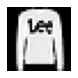

------------------


Actual Value is Trouser
Predicted Value is  Trouser


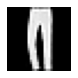

------------------


Actual Value is Trouser
Predicted Value is  Trouser


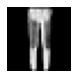

------------------


Actual Value is Shirt
Predicted Value is  Shirt


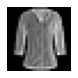

------------------


Actual Value is Trouser
Predicted Value is  Trouser


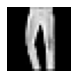

------------------


Actual Value is Coat
Predicted Value is  Coat


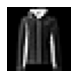

------------------


Actual Value is Shirt
Predicted Value is  Shirt


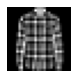

------------------


Actual Value is Sandal
Predicted Value is  Sandal


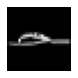

------------------




In [91]:
# Printing first nine predicted and actual values
for i in range(9):
    print("Actual Value is" ,test_Yc[i]) # test data 
    print("Predicted Value is ",predictionc1[i]) # predictions
    plt.subplot(3,3,i+1)
    show_image(test_X[i].reshape(28,28))
    print("------------------")
    print("\n")

### Confusion Matrix and Performance Score

In [92]:
cm = confusion_matrix(test_Y, predictionc) 
#printing the confusion matrix to see corrrect and wrong predicted values
print(cm)

[[800   0   5 156   2   0  33   0   4   0]
 [  0 949   0  48   0   0   2   0   1   0]
 [ 55   0 680  74 133   0  58   0   0   0]
 [  7   0   0 984   3   0   6   0   0   0]
 [ 17   1  14 127 811   0  30   0   0   0]
 [  0   0   0   1   0 869   0 110   3  17]
 [187   0  32 165 142   0 471   0   3   0]
 [  0   0   0   0   0   1   0 980   0  19]
 [ 15   0   2  16   0   1   0   1 965   0]
 [  1   0   0   0   0   2   0  36   0 961]]


<Axes: >

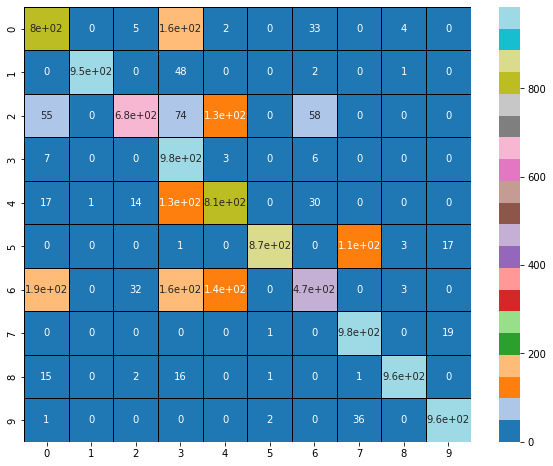

In [93]:
plt.figure(figsize=(10,8)) # visualising the confusion matrix in heatmap
sns.heatmap(cm,annot=True, cmap= 'tab20',linewidths=1, linecolor= 'black')

In [94]:
print("Precision Score is ", precision_score(test_Y,  predictionc, average = 'weighted'))

Precision Score is  0.8638325170358898


In [95]:
print("Recall Score is ", recall_score(test_Y,  predictionc, average = 'weighted'))

Recall Score is  0.847


In [96]:
print("F1 Score is ", f1_score(test_Y,  predictionc, average = 'weighted'))

F1 Score is  0.8445080875402742


## Ques 1  d. Make a comparison table including the above three models’ performance on the test data (accuracy), number of trainable parameters and the execution time.

#### All the model are trained for batch size = 32 and epoch = 20

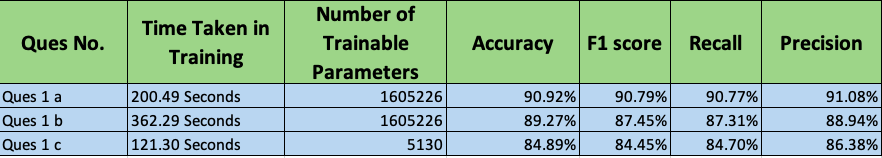

##### System Configuration

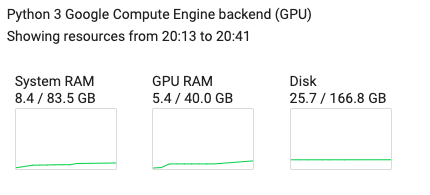

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.DataFrame({'Training Time Taken': [200.49, 362.29, 121.30], 'Trainable Parameters': [1605226, 1605226,5130],
                 'Accuracy': [90.92,89.27,84.89], 'Model':['part a' , 'part b' , 'part c']})

In [3]:
df

,Training Time Taken,Trainable Parameters,Accuracy,Model
0,200.49,1605226,90.92,part a
1,362.29,1605226,89.27,part b
2,121.30,5130,84.89,part c


Text(0, 0.5, 'Training time taken (Seconds)')

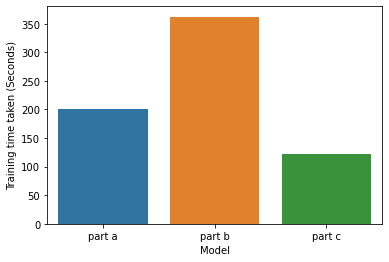

In [4]:
sns.barplot(data= df, x= 'Model', y='Training Time Taken')
plt.ylabel('Training time taken (Seconds)')

<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

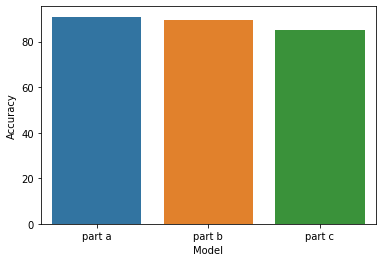

In [5]:
sns.barplot(data= df, x= 'Model', y='Accuracy')

<AxesSubplot:xlabel='Model', ylabel='Trainable Parameters'>

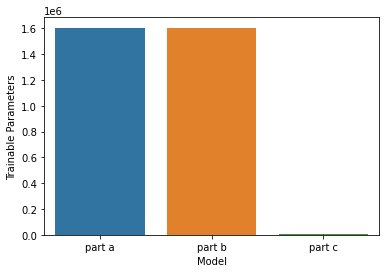

In [6]:
sns.barplot(data= df, x= 'Model', y='Trainable Parameters')

### Results

Model was comparison was done on the basis of accuracy , training time taken and trainable parameters for all three models ie. simple convolution model (part a) , convolution model with data augmentation (part b) and pretrained vgg model ( part c). Trainable parameters was less for part c i.e 5130 model where other two models have 1605226 trainable parameters. Accuracy is more for part a i.e simple convolution model (90.92%) whereas other two models have accuracy 89% and 84% respectively. Training time taken was highest for part b where data augmentation was done on the fly i.e. it took around 363 seconds whereas for part c ( transfer learning) training time was less ie. it took around 122 seconds. 
With reference to accuracy, part a has highest accuracy ie. 90% whereas accuracy was comparatively less for partb and part c. 

## Ques2 Developing ResNet model from scratch. Apply a residual network specified in the following architecture. All convolutional layers use kernel size 3, stride = 1, and padding = “same”

## Link for Trained Model is given below

https://drive.google.com/drive/u/2/folders/1anKLUX8RfCPfxEoU0_P16baZzBksvP3g

In [ ]:
from tensorflow.keras.datasets import cifar10 #importing the cifar dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import color
import warnings
import tensorflow
from tensorflow.keras.utils import to_categorical

warnings.filterwarnings("ignore")

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Concatenate, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model # importing libraries to create model from scratch 

In [ ]:
(x_traincifar, y_traincifar), (x_testcifar, y_testcifar) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
## Visualising a few images

def show_image(image, cmap_type= 'gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.axis('off')
    plt.show()

In [ ]:
#visualising first ten products

sample11= x_traincifar[:9]

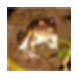

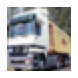

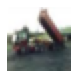

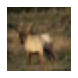

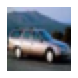

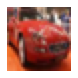

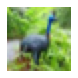

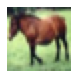

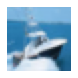

In [ ]:
for a,i in enumerate(sample11):
    plt.subplot(3,3,a+1)
    show_image((i))

In [ ]:
## Normalising the data

x_traincifar = x_traincifar / 255.0
x_testcifar = x_testcifar / 255.0

In [ ]:
# One hot encoding the target variable 

y_traincifar_one_hot = to_categorical(y_traincifar, num_classes=10)
y_testcifar_one_hot = to_categorical(y_testcifar, num_classes=10)

### Modelling

### Model Architecture

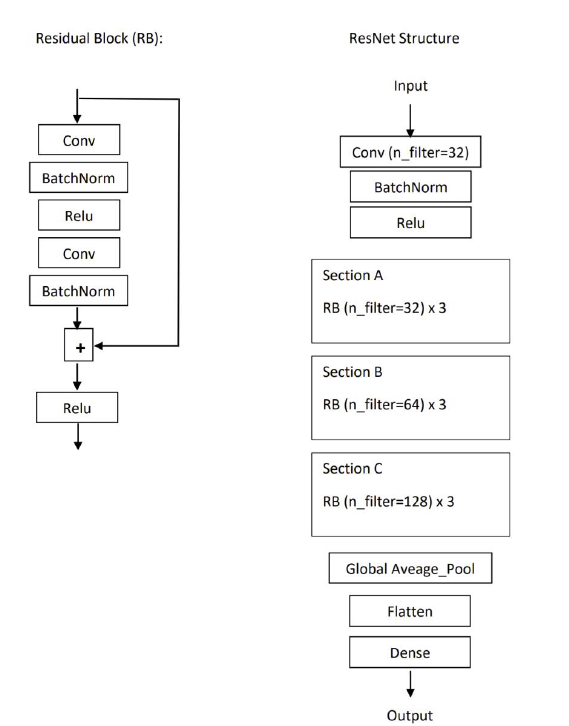

The ResNet model architecture consists of the following layers:

Input layer: A 3D tensor of shape (32, 32, 3) representing the input image.

Conv2D layer: A 2D convolutional layer with 32 filters, kernel size of 3, and padding of "same".

Batch Normalization layer: Normalizes the activations of the previous convolutional layer.

Activation layer: Applies the ReLU activation function to the previous layer.

Residual unit: Consists of two 2D convolutional layers with 32 filters, kernel size of 3, and padding of "same", followed by Batch Normalization layers and ReLU activation functions. Concatenates the output of the first layer with the shortcut connection and applies the ReLU activation function.

Residual units: Two more residual units consisting of convolutional, Batch Normalization, and activation layers with 64 and 128 filters, respectively.

Each Residual Block is repeated thrice so that the model can learn more features

Global Average Pooling 2D layer: Computes the spatial average of the previous layer's output across all channels.

Dense layer: A fully connected layer with 10 neurons, representing the output classes.

Softmax activation layer: Applies the softmax function to the output of the previous layer.



### Hyperparameter Used

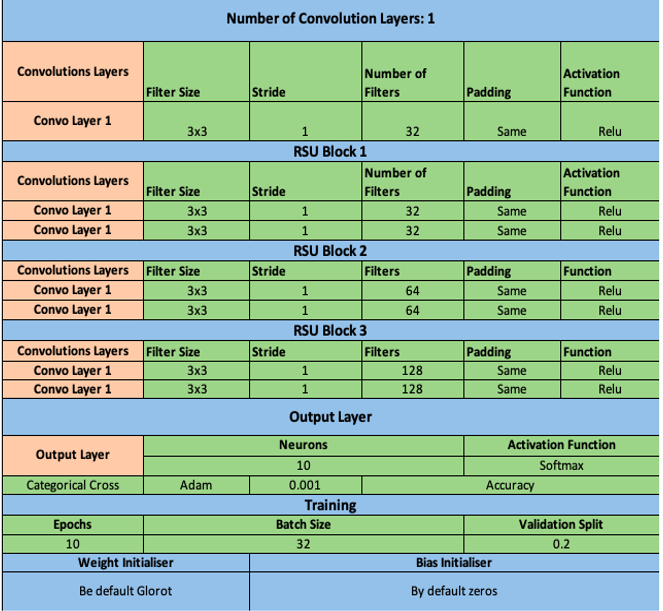

### Model Development

In [ ]:
def residual_unit(x, filters): # creating a function to add RSU block for different number of filters
    shortcut = x
    # adding convo , batch normalisation layer
    x = Conv2D(filters, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)

    if shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=1, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Concatenate()([shortcut, x])
    x = Activation('relu')(x)

    return x

In [ ]:
def resnet(): # creating a function to create Restnet model 
    input = Input(shape=(32, 32, 3))

    x = Conv2D(32, kernel_size=3, padding='same')(input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    # calling function to add RSU block
    x = residual_unit(x, 32)
    x = residual_unit(x, 32)
    x = residual_unit(x, 32)
    
    x = residual_unit(x, 64)
    x = residual_unit(x, 64)
    x = residual_unit(x, 64)
    
    x = residual_unit(x, 128)
    x = residual_unit(x, 128)
    x = residual_unit(x, 128)
# adding the Global average pooling layer, By adding this layer we dont need to flatten the data and add dense layer
    x = GlobalAveragePooling2D()(x)

    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=input, outputs=output)

    return model

In [ ]:
modeld = resnet()
# compiling the model
modeld.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Model Summary

In [ ]:
modeld.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 32)   896         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 32)  128         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 32, 32, 32)   0           ['batch_normalization[0][0]']

This is a custom-built RESNET model (convolutional neural network model with skip connections). It takes an input of size (32, 32, 3) and has a total of 392,906 parameters, out of which 391,946 are trainable and 960 are non-trainable.

The model has several convolutional layers with batch normalization and activation functions, and skip connections are added between them. It ends with a global average pooling layer followed by a dense layer with 10 units, representing the 10 classes in the dataset.

Overall, the model aims to learn hierarchical representations of the input images through the convolutional layers and use the skip connections to preserve important features from the earlier layers. Finally, the global average pooling layer condenses the learned representations into a fixed-length vector, which is fed to the output dense layer for classification.

### Training the Model 

In [ ]:
historyd = modeld.fit(x_traincifar, y_traincifar_one_hot, batch_size=32, epochs=10, validation_split = 0.2)

Epoch 1/10
1250/1250 [==============================] - 55s 24ms/step - loss: 1.4726 - accuracy: 0.4556 - val_loss: 1.5119 - val_accuracy: 0.4458
Epoch 2/10
1250/1250 [==============================] - 30s 24ms/step - loss: 1.0759 - accuracy: 0.6130 - val_loss: 1.1243 - val_accuracy: 0.6212
Epoch 3/10
1250/1250 [==============================] - 30s 24ms/step - loss: 0.9055 - accuracy: 0.6776 - val_loss: 0.9276 - val_accuracy: 0.6795
Epoch 4/10
1250/1250 [==============================] - 30s 24ms/step - loss: 0.7911 - accuracy: 0.7198 - val_loss: 0.9423 - val_accuracy: 0.6710
Epoch 5/10
1250/1250 [==============================] - 30s 24ms/step - loss: 0.6866 - accuracy: 0.7567 - val_loss: 0.8018 - val_accuracy: 0.7130
Epoch 6/10
1250/1250 [==============================] - 30s 24ms/step - loss: 0.6107 - accuracy: 0.7885 - val_loss: 0.9870 - val_accuracy: 0.6991
Epoch 7/10
1250/1250 [==============================] - 30s 24ms/step - loss: 0.5462 - accuracy: 0.8101 - val_loss: 0.8426 -

### Saving the Trained Model

In [ ]:
# Saving the trained model
modeld.save('cifar_model.h5')

### Evaluating the Model 

In [ ]:
# evaluating the performance of model in test data 

test_evald = modeld.evaluate(x_testcifar,y_testcifar_one_hot, verbose=0)

In [ ]:
print('Test loss:', test_evald[0])
print('Test accuracy:', test_evald[1])

Test loss: 0.6992190480232239
Test accuracy: 0.763700008392334


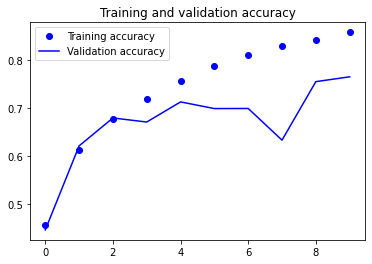

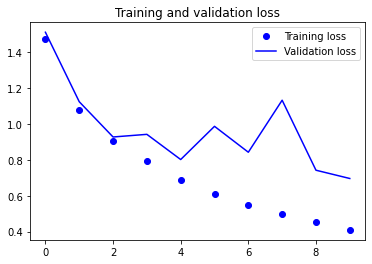

In [ ]:
# print both accuracy and loss per ephoch for both training and validation set
# Getting the model accuracy from keras callback history function


accuracy = historyd.history['accuracy']
val_accuracy = historyd.history['val_accuracy']
loss = historyd.history['loss']
val_loss = historyd.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Loading the Saved Model 

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
# Loading the saved model
cifar_trainedmodel = load_model('cifar_model.h5')

### Predictions

In [ ]:
# predicting the probablities for all class  using saved model 
predictiond= cifar_trainedmodel.predict(x_testcifar)

313/313 [==============================] - 2s 6ms/step


#### using np.argmax to get the index of max probablity value for the specific class.As the target values is one hot encoded, the returned index from predictions will map to the index of one hot encoded which will give the number. For example, if the predicted output for a given input is [0, 0, 0.8, 0.2, 0, 0, 0, 0, 0, 0], the np.argmax() function will return 2, which is the index of the maximum value in the predicted vector. Since the classes are numbered from 0 to 9 in this case, the predicted class label is 2, which corresponds to the digit 2.

In [ ]:
predictiond = np.argmax(np.round(predictiond),axis=1)

In [ ]:
# dictionary to match numbers with items 

items_dict= {9: "Truck", 8: "Ship",7: "Horse", 6: 'Frog', 5: 'Dog', 4: 'Deer', 3:"Cat", 2: 'Bird',
              1: 'Automobile' , 0 :'Airplane'}

In [ ]:
y_testcifar1 = [""]*len(y_testcifar) #mapping actual labels numbers to items
for i in range(len(y_testcifar)):
    y_testcifar1[i] = items_dict[y_testcifar[i][0]]

In [ ]:
predictiond1= [""]*len(predictiond)
for i in range(len(predictiond)):
    predictiond1[i] = items_dict[predictiond[i]]

Actual Value is Cat
Predicted Value is  Cat


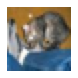

------------------


Actual Value is Ship
Predicted Value is  Ship


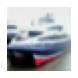

------------------


Actual Value is Ship
Predicted Value is  Ship


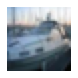

------------------


Actual Value is Airplane
Predicted Value is  Airplane


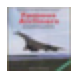

------------------


Actual Value is Frog
Predicted Value is  Frog


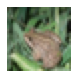

------------------


Actual Value is Frog
Predicted Value is  Frog


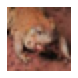

------------------


Actual Value is Automobile
Predicted Value is  Automobile


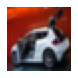

------------------


Actual Value is Frog
Predicted Value is  Frog


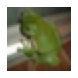

------------------


Actual Value is Cat
Predicted Value is  Cat


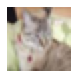

------------------




In [ ]:
# Printing first nine predicted and actual values
for i in range(9):
    print("Actual Value is" ,y_testcifar1[i]) # test data 
    print("Predicted Value is ",predictiond1[i]) # predictions
    plt.subplot(3,3,i+1)
    show_image(x_testcifar[i])
    print("------------------")
    print("\n")

### Confusion Matrix and Performance Score

In [ ]:
cm = confusion_matrix(y_testcifar, predictiond) 
#printing the confusion matrix to see corrrect and wrong predicted values
print(cm)

[[826   0  89   1   4   1  10  14  53   2]
 [ 82 844   9   1   1   1  19  10  24   9]
 [ 80   0 858   1   8  13  27   9   4   0]
 [278   0 138 340  19 137  60  23   4   1]
 [172   0 172   6 552  12  38  43   5   0]
 [140   0 104  17  12 671  22  33   1   0]
 [ 68   0  92   5   6   9 813   5   2   0]
 [ 51   0  68   3  10  15   1 852   0   0]
 [ 67   4  10   0   0   1   7   8 901   2]
 [142  74   6   0   1   5  21  43  26 682]]


<Axes: >

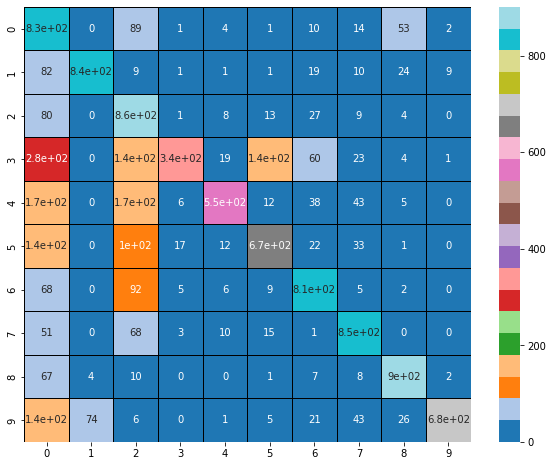

In [ ]:
plt.figure(figsize=(10,8)) # visualising the confusion matrix in heatmap
sns.heatmap(cm,annot=True, cmap= 'tab20',linewidths=1, linecolor= 'black')

In [ ]:
print("Precision Score is ", precision_score(y_testcifar, predictiond, average = 'weighted'))

Precision Score is  0.7970126970511039


In [ ]:
print("Recall Score is ", recall_score(y_testcifar, predictiond, average = 'weighted'))

Recall Score is  0.7339


In [ ]:
print("F1 Score is ", f1_score(y_testcifar, predictiond, average = 'weighted'))

F1 Score is  0.735701149804657


## Results 

RESNET model has a total of 1,646,858 parameters, out of which 1,643,210 are trainable and 3,648 are non-trainable.Model was trained for 10 epochs and accuracy for the model was 70%. Recall and Precision score for the model is less as compared to above three models. Recall and Precision score is 73% and 79% respectively. This may be due to the complexity of the model as the learning curve shows that training accracy is more than validation accuracy.  Confusion matrix, recall and precision score is given above. 